In [16]:
# Carrega Bibliotecas

library(dplyr)
library(ggplot2)
library(daltoolbox)
library(RColorBrewer)


In [2]:
# Carrega Dataset
load("../data/malaria/malaria.RData")

# Lista Objetos
ls()

[1] "data"

In [3]:
# Exibe as Colunas
head(data)

,infection.county,home.county,notification.county,qty.parasites,scheme,notification.hr,home.hr,infection.hr,exam.type,exam.result,⋯,exam.month,exam.year,treatment.month,treatment.year,symptom.month,symptom.year,exam.interval,treatment.interval,notification.interval,previous.treatment
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>
1,110001,110001,110001,501100,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,02,2014,02,2014,02,2014,on the same day,on the same day,on the same day,vivax
2,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,12,2014,12,2014,12,2014,on the same day,on the same day,1 to 7 days,vivax
3,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2014,11,2014,11,2014,on the same day,on the same day,on the same day,no
4,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2013,10,2013,10,2013,on the same day,on the same day,1 to 7 days,no
5,110001,110001,110001,3,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2014,10,2014,10,2014,on the same day,on the same day,1 to 7 days,no
6,110001,110001,110001,305500,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2013,11,2013,NA,NA,1 to 7 days,on the same day,NA,no


In [4]:
# Visão Geral dos Dados
summary(data)

 infection.county    home.county       notification.county qty.parasites     
 130260 :  254086   130260 :  341082   120020 : 2367517    Min.   :     0    
 120020 :  195149   120020 :  199012   130260 : 2076083    1st Qu.:    60    
 150070 :  143708   150070 :  138806   110020 : 1018178    Median :   700    
 110020 :  138296   110020 :  137645   120033 :  881393    Mean   :  3335    
 130380 :   98734   130380 :   96825   130040 :  682656    3rd Qu.:  2500    
 (Other): 2064572   (Other): 2053342   150070 :  617060    Max.   :999999    
 NA's   :20029432   NA's   :19957265   (Other):15281090    NA's   :22062051  
     scheme                                notification.hr   
 1      : 2192733   MANAUS ENTORNO E ALTO RIO NEGRO:4245518  
 99     :  208923   JURUA E TARAUACA/ENVIRA        :3940345  
 5      :   95601   MADEIRA-MAMORE                 :1318581  
 2      :   47841   REGIONAL JURUA                 :1256899  
 11     :   46571   MARAJO II                      :1234896  
 (Ot

In [5]:
# Amostra dos Valores de Cada Coluna
glimpse(data)

Rows: 22,923,977
Columns: 40
$ infection.county      <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ home.county           <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ notification.county   <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ qty.parasites         <dbl> 501100, NA, NA, NA, 3, 305500, NA, NA, NA, 50110…
$ scheme                <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 99, 1, 1, 1,…
$ notification.hr       <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ home.hr               <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ infection.hr          <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ exam.type             <fct> thick and thin blood smears, thick and thin bloo…
$ exam.result           <fct> vivax, vivax, vivax, vivax, vivax, vivax, vivax,…
$ gender                <fct> male, male, male, male, female, male, female, ma…
$ hemiparasite          <fct> negative, not researched, negative, not research…
$ symptom  

In [6]:
# número de linhas e colunas
print(paste("Número de Linhas:",nrow(data)))
print(paste("Número de Colunas:",ncol(data)))

[1] "Número de Linhas: 22923977"
[1] "Número de Colunas: 40"


In [7]:
# selecionar colunas de regiões e anos

sra <- select(data, home.state, exam.year)

table(sra)

          exam.year
home.state   2009   2010   2011   2012   2013   2014   2015   2016   2017
        RO  51441  53612  38038  30292  18566  12369   9828   9608   9302
        AC  29101  41534  25621  30488  37360  34007  29567  38833  42603
        AM 143058 106677  94522 114888 106268  90647 102620  74978 112154
        RR  17357  25236  15519   9755  10029   8953   9671  10022  16443
        PA 125907 183043 142056  95708  29811  13567  11366  18571  51714
        AP  17795  17632  21421  17202  17497  15611  16153  14332  17763
        TO    198    199    101     95     88     32     24     34    566
        MA   9186   7172   5890   3697   4907   3983   2406   2053   3532
        PI      1     34     16     21     93     31      3      5      3
        CE      6      8      1      3     14      6      0      2      0
        RN      1      4      4      3      5      4      0      0      0
        PB      6      6      3      7     15      8      0      2      2
        PE      0 

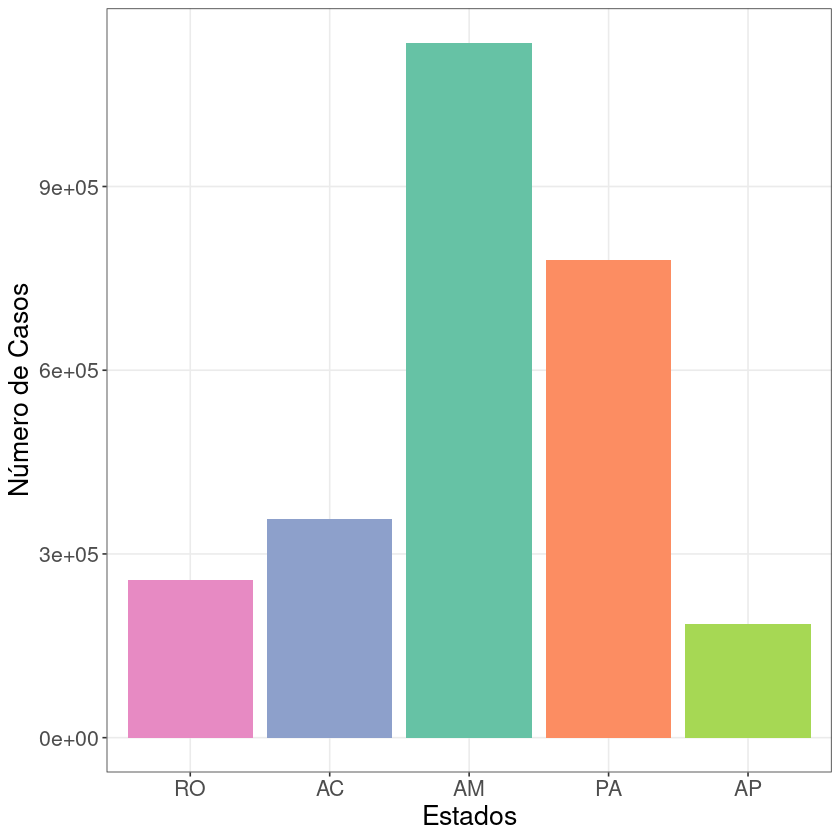

In [90]:
# filtra os dados para plotar

#gra <- sra |> group_by(home.state) |> summarize(exam.year=count(exam.year))

#filtra ano=2009, valores nulos, e os 5 maiores estados

gra <- sra %>% group_by(home.state) %>% count(exam.year=2009, sort=TRUE, name="Total") 
gra <- gra[,-2]
gra <- gra[-1,]
gra <- head(gra,n=5)


colors <- brewer.pal(5, 'Set2')
# setting the font size for all charts
font <- theme(text = element_text(size=16))

grf <- plot_bar(gra, colors=colors[1:5], label_x = "Estados", label_y = "Número de Casos") + font
plot(grf)


In [47]:
args(plot_bar)

function (data, label_x = "", label_y = "", colors = NULL, alpha = 1) 
NULL